## Project Overview: "Sales Analysis and Visualization"

### Step 1: Project Scope
- **Objective**: Analyze and visualize sales data to uncover trends, patterns, and insights that can help improve business decisions.

### Step 2: Install the necessary libraries:

In [10]:
pip install numpy pandas seaborn matplotlib jupyter

Note: you may need to restart the kernel to use updated packages.


### Step 3: Data Collection and Preparation

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataset
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Step 4: Data Cleaning and Exploration
1. **Handle Missing Values**:

In [12]:
df.isnull().sum()

# Drop rows with missing values (or handle them accordingly)
df.dropna(inplace=True)

2. **Data Transformation**:

In [13]:
# Convert date columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

3. **Descriptive Statistics**:

In [14]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9789.000000,9789,9789,9789.000000,9789.000000
mean,4896.705588,2017-05-01 02:51:57.866993664,2017-05-05 01:56:03.898253056,55273.322403,230.116193
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2449.000000,2016-05-23 00:00:00,2016-05-27 00:00:00,23223.000000,17.248000
50%,4896.000000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.384000
75%,7344.000000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.392000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2827.486899,NaN,NaN,32041.223413,625.302079


4. **Data Visualization**:

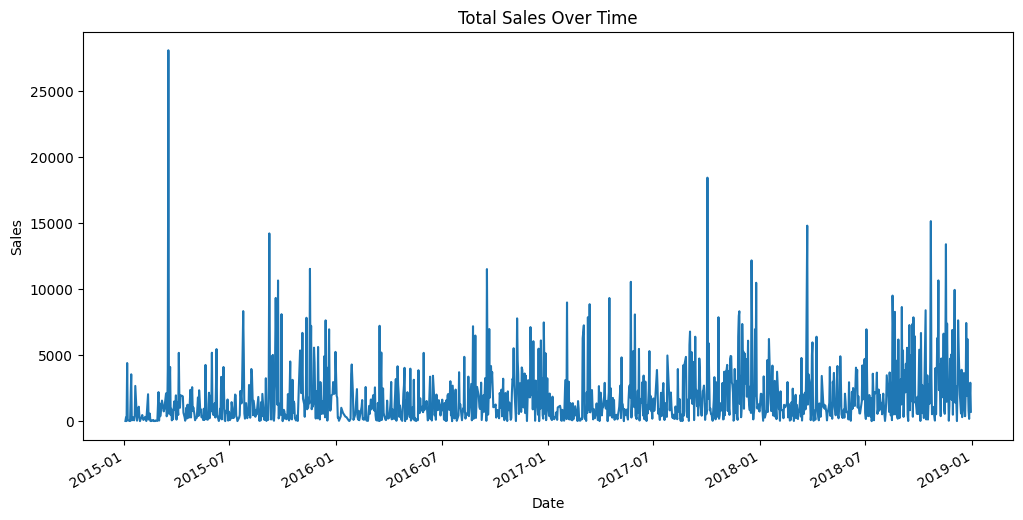

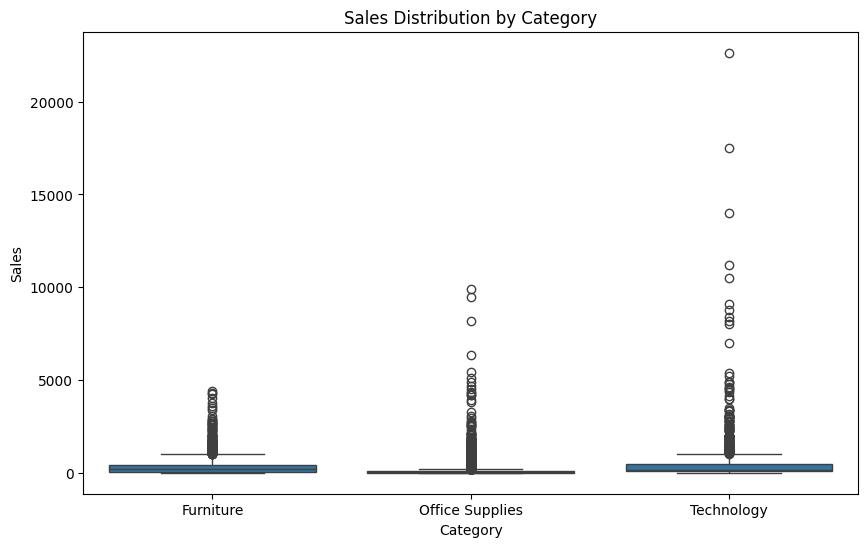

In [15]:
# Sales over time
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Sales distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.show()

5. **Correlation Analysis**:

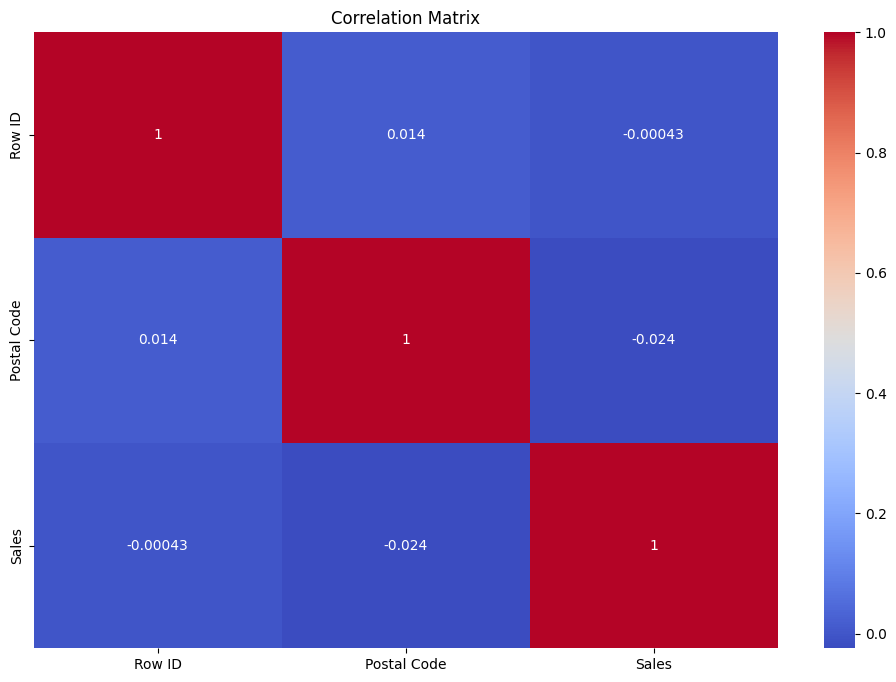

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

6. **Monthly Sales Analysis**:

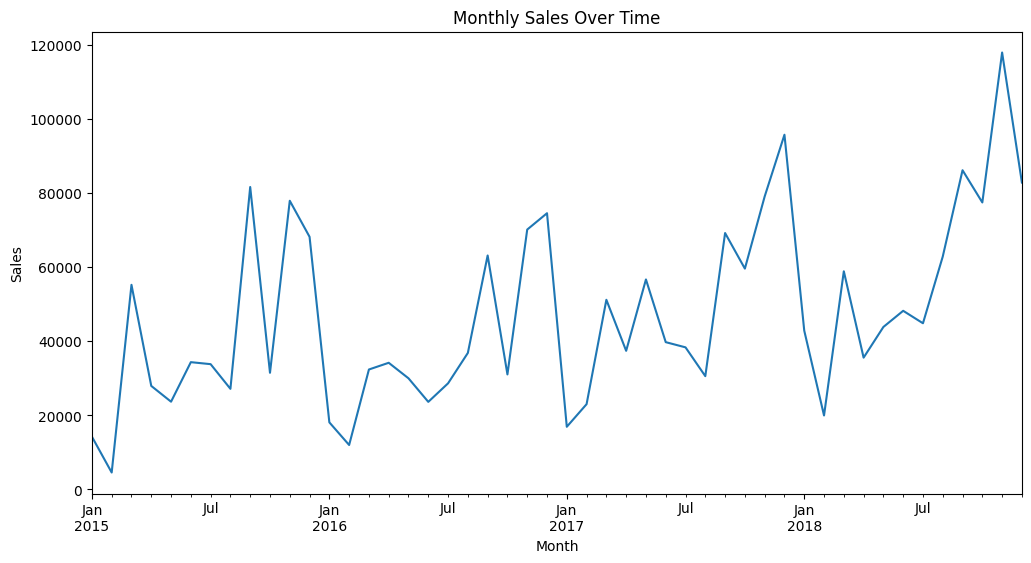

In [18]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

7. **Top Products by Sales**:

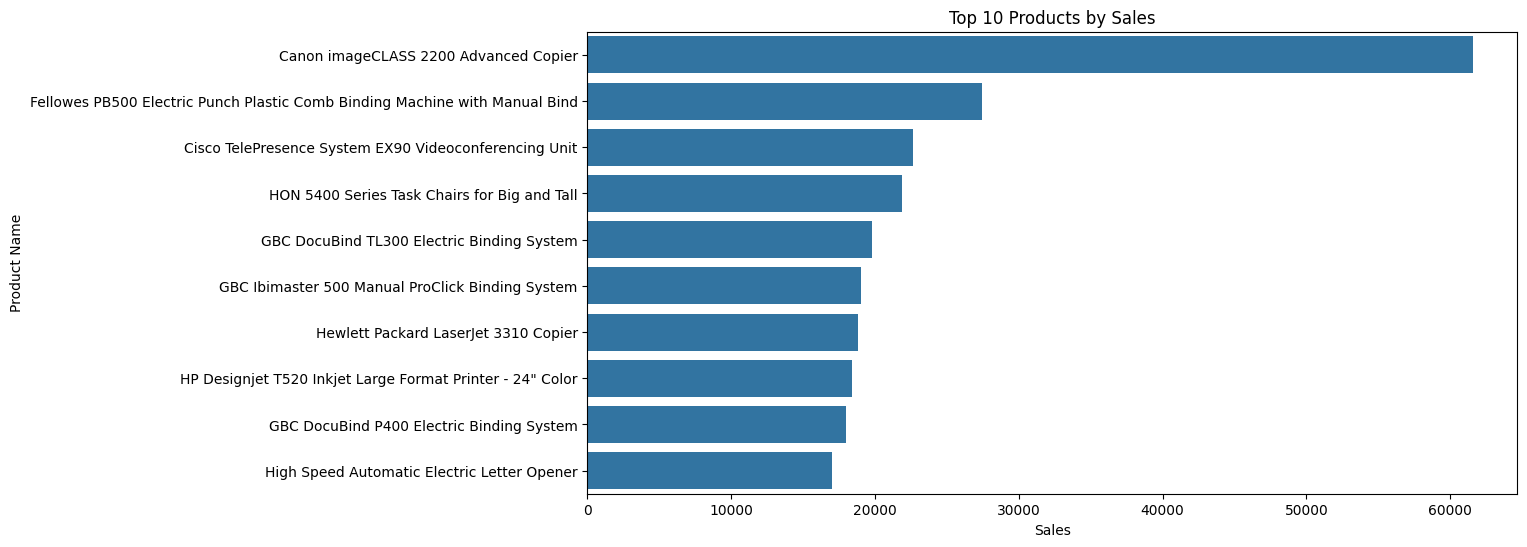

In [20]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Sales')
plt.xlabel('Sales')
plt.ylabel('Product Name')
plt.show()